**Name** : Himanshu Aggarwal

**Email** : erhimanshuagarwal79@gmail.com

**Assignment Name** : Assignment_3_REGRESSION_ML_11092025.ipynb

**Phone No.** : 9711783242

**Question 1. What is Simple Linear Regression?**

- Simple Linear Regression is a statistical method used to model the relationship between two continuous variables.

- It assumes a linear relationship between the independent variable (predictor) and the dependent variable (response).

- The goal is to find the best-fitting straight line that describes how the dependent variable changes as the independent variable changes. This line can then be used to make predictions.

**Question 2: What are the key assumptions of Simple Linear Regression?**

The key assumptions of Simple Linear Regression are:

- **Linearity:** The relationship between the independent and dependent variables is linear.

- **Independence:** The observations are independent of each other.
Homoscedasticity: The variance of the errors is constant across all levels of the independent variable.

- **Normality:** The errors are normally distributed.

- **No multicollinearity:** (Although more relevant for multiple linear regression, it's good practice to mention) The independent variables are not highly correlated with each other.

**Question 3: What is heteroscedasticity, and why is it important to address in regression models?**

Heteroscedasticity refers to the situation in regression analysis where the variance of the errors (or residuals) is not constant across all levels of the independent variable(s). In other words, the spread of the residuals changes as the predictor variable(s) change.

It is important to address heteroscedasticity in regression models because:

- **Inefficient estimates:** While the coefficient estimates may still be unbiased, they are no longer the most efficient (i.e., they have higher variance than they would if homoscedasticity held). This means your confidence intervals will be wider and your hypothesis tests will be less powerful.

- **Incorrect standard errors:** The standard errors of the coefficient estimates will be biased, leading to incorrect t-statistics and p-values. This can result in incorrect conclusions about the statistical significance of your predictors.

- **Invalid hypothesis tests:** Because the standard errors are incorrect, hypothesis tests (like t-tests and F-tests) will not be valid.
Addressing heteroscedasticity can involve techniques like:

    - Transforming the dependent variable.
    - Using weighted least squares regression.
    - Using robust standard errors.

**Question 4: What is Multiple Linear Regression?**

- Multiple Linear Regression is an extension of simple linear regression that models the relationship between a dependent variable and two or more independent variables.

- Instead of fitting a straight line, it fits a hyperplane in a multi-dimensional space to represent the relationship.

- The goal is to find the combination of independent variables that best predicts the dependent variable.

**Question 5: What is polynomial regression, and how does it differ from linear regression?**

- Polynomial regression is a form of regression analysis in which the relationship between the independent variable and the dependent variable is modeled as an nth degree polynomial.
- While linear regression models the relationship with a straight line (a polynomial of degree 1), polynomial regression can model non-linear relationships by including polynomial terms (e.g., x^2, x^3, etc.) in the model equation.
- This allows polynomial regression to fit curves to the data, providing a more flexible approach when the relationship is not strictly linear.

**Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:**

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

**Plot the regression line over the data points.**

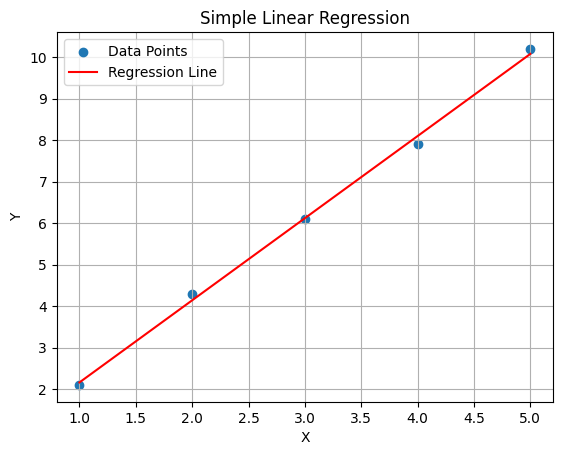

Intercept: 0.17999999999999794
Coefficient: 1.9800000000000004


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # Reshape for scikit-learn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
Y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(X, Y, label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

**Question 7: Fit a Multiple Linear Regression model on this sample data:**

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

**Check for multicollinearity using VIF and report the results.**

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
data = {'Area': [1200, 1500, 1800, 2000],
        'Rooms': [2, 3, 3, 4],
        'Price': [250000, 300000, 320000, 370000]}
df = pd.DataFrame(data)

# Define independent and dependent variables
X = df[['Area', 'Rooms']]
y = df['Price']

# Fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

print("Multiple Linear Regression Model:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print("-" * 30)

# Check for multicollinearity using VIF
# Add a constant to the independent variables for VIF calculation
X_with_constant = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i)
                   for i in range(X_with_constant.shape[1])]

print("Multicollinearity Check (VIF):")
display(vif_data)

Multiple Linear Regression Model:
Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]
------------------------------
Multicollinearity Check (VIF):


,feature,VIF
0,const,34.210526
1,Area,7.736842
2,Rooms,7.736842


**Question 8: Implement polynomial regression on the following data:**

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

**Fit a 2nd-degree polynomial and plot the resulting curve.**

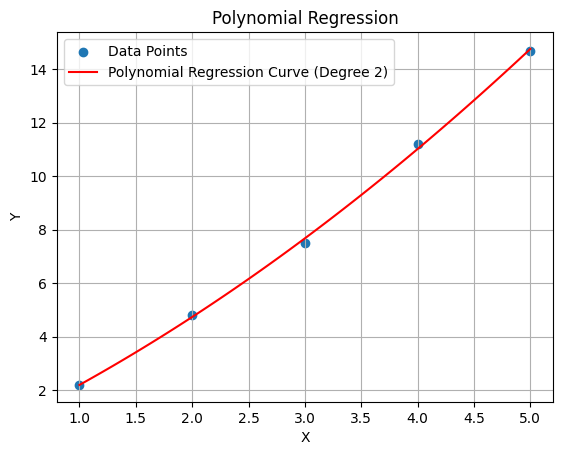

Coefficients (including intercept): [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (2nd degree)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Create and fit the model
model = LinearRegression()
model.fit(X_poly, Y)

# Generate points for plotting the curve
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
Y_plot = model.predict(X_plot_poly)

# Plot the data and the polynomial regression curve
plt.scatter(X, Y, label='Data Points')
plt.plot(X_plot, Y_plot, color='red', label='Polynomial Regression Curve (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients
print(f"Coefficients (including intercept): {model.coef_}")
print(f"Intercept: {model.intercept_}")

**Question 9: Create a residuals plot for a regression model trained on this data:**

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

**Assess heteroscedasticity by examining the spread of residuals.**

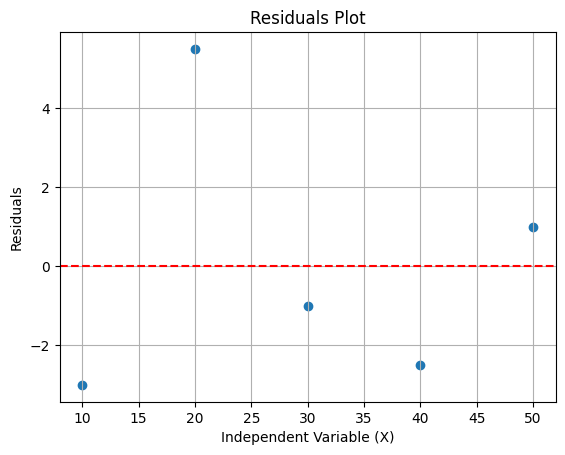

Assessing Heteroscedasticity:
Examine the residuals plot. If the spread of residuals is roughly constant across all values of X,
it suggests homoscedasticity. If the spread of residuals changes as X changes (e.g., widens or narrows),
it suggests heteroscedasticity.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Create the residuals plot
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# Assess heteroscedasticity
print("Assessing Heteroscedasticity:")
print("Examine the residuals plot. If the spread of residuals is roughly constant across all values of X,")
print("it suggests homoscedasticity. If the spread of residuals changes as X changes (e.g., widens or narrows),")
print("it suggests heteroscedasticity.")

**Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.**


**Answer:** Following are the steps I would take as a data scientist to address heteroscedasticity and multicollinearity in a real estate price prediction model:

**Addressing Heteroscedasticity:**

**Identify Heteroscedasticity:**

- **Residuals Plot:** As we just did in the previous question, I would start by plotting the residuals against the predicted values or the independent variables. A fanning-out or fanning-in pattern in the plot indicates heteroscedasticity.

- **Statistical Tests:** I would also use formal statistical tests like the Breusch-Pagan test or the White test to confirm the presence of heteroscedasticity.

**Addressing Heteroscedasticity:**

- **Data Transformation:** I would consider transforming the dependent variable (house price) or one or more of the independent variables. Common transformations include using the logarithm (log) of the variable, square root, or reciprocal. Log transformation is often effective for skewed data like house prices and can help stabilize the variance.

- **Weighted Least Squares (WLS):** If the form of heteroscedasticity is known or can be estimated, I would use Weighted Least Squares regression. WLS assigns lower weights to observations with higher variances and higher weights to observations with lower variances, effectively giving more importance to the data points that are more reliably measured.

- **Robust Standard Errors:** If transformations or WLS are not suitable or don't fully resolve the issue, I would use robust standard errors (also known as heteroscedasticity-consistent standard errors). These standard errors provide correct inference (valid p-values and confidence intervals) even in the presence of heteroscedasticity, although the coefficient estimates themselves are not changed. This is often a good starting point if the primary goal is valid inference.

**Addressing Multicollinearity:**

**- Identify Multicollinearity:**

- **Correlation Matrix:** I would calculate the correlation matrix among the independent variables. High correlation coefficients (e.g., above 0.7 or 0.8 in absolute value) between two or more predictors suggest potential multicollinearity.

- **Variance Inflation Factor (VIF):** As we did in Question 7, I would calculate the VIF for each independent variable. A VIF value greater than 5 or 10 is often considered an indication of significant multicollinearity.

**- Addressing Multicollinearity:**
- **Feature Selection:** If two or more variables are highly correlated, I would consider removing one of them from the model. The decision of which variable to remove would depend on domain knowledge, the strength of the correlation, and the variable's individual correlation with the dependent variable.

- **Combine Variables:** Sometimes, highly correlated variables can be combined into a single variable. For example, instead of using both "number of bedrooms" and "number of bathrooms" if they are highly correlated, a combined "number of rooms" feature might be created.

- **Principal Component Analysis (PCA):** PCA is a dimensionality reduction technique that can transform the correlated independent variables into a set of uncorrelated variables called principal components. These principal components can then be used as predictors in the regression model. This approach can be useful when multicollinearity is severe among many predictors.

- **Ridge Regression or Lasso Regression:** These are regularization techniques that can handle multicollinearity by adding a penalty term to the loss function. Ridge regression shrinks the coefficients of correlated variables towards zero, while Lasso regression can set some coefficients exactly to zero, effectively performing feature selection.

**Ensuring a Robust Model:**

Beyond addressing heteroscedasticity and multicollinearity, I would also take these steps to ensure a robust model:

- **Outlier Detection and Handling:** Identify and appropriately handle outliers in the data, as they can disproportionately influence regression results.

- **Model Validation:** Use techniques like cross-validation to assess the model's performance on unseen data and ensure it generalizes well.
Residual Analysis: Continue to examine residual plots and other diagnostic plots even after addressing initial issues to ensure the model assumptions are reasonably met.

- **Domain Knowledge:** Incorporate real estate domain expertise throughout the process to guide feature selection, transformations, and interpretation of results.

By systematically addressing these issues, I could build a more reliable and accurate model for predicting house prices.